In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Electric_Vehicle_Population_Data.csv to Electric_Vehicle_Population_Data (1).csv


In [ ]:
df = pd.read_csv('Electric_Vehicle_Population_Data.csv')

In [ ]:
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,WBY8P4C55K,King,Bothell,WA,98011.0,2019,BMW,I3,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,126.0,0.0,1.0,249382416,POINT (-122.20563 47.76144),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
1,KNDCE3LG1K,Thurston,Olympia,WA,98502.0,2019,KIA,NIRO,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,239.0,0.0,22.0,102638791,POINT (-122.92333 47.03779),PUGET SOUND ENERGY INC,5.306701e+10
2,5YJYGDEE8L,King,Seattle,WA,98125.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291.0,0.0,46.0,112603774,POINT (-122.30253 47.72656),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
3,1N4AZ0CP0F,Thurston,Olympia,WA,98506.0,2015,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84.0,0.0,22.0,187006893,POINT (-122.87741 47.05997),PUGET SOUND ENERGY INC,5.306701e+10
4,WA1E2AFY8R,King,Seattle,WA,98119.0,2024,AUDI,Q5 E,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,23.0,0.0,36.0,271736741,POINT (-122.3684 47.64586),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10


In [ ]:
df.shape

(223995, 17)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223995 entries, 0 to 223994
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         223995 non-null  object 
 1   County                                             223992 non-null  object 
 2   City                                               223992 non-null  object 
 3   State                                              223995 non-null  object 
 4   Postal Code                                        223992 non-null  float64
 5   Model Year                                         223995 non-null  int64  
 6   Make                                               223995 non-null  object 
 7   Model                                              223995 non-null  object 
 8   Electric Vehicle Type                              223995 non-null  object

In [ ]:
df.describe()

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,223992.000000,223995.000000,223977.000000,223977.000000,223521.000000,2.239950e+05,2.239920e+05
mean,98176.491165,2021.264408,47.736187,829.894386,28.876361,2.329328e+08,5.297997e+10
std,2544.240509,2.989676,84.987140,7372.509049,14.911023,6.884329e+07,1.531491e+09
min,1731.000000,1999.000000,0.000000,0.000000,1.000000,4.385000e+03,1.001020e+09
25%,98052.000000,2020.000000,0.000000,0.000000,17.000000,2.008002e+08,5.303301e+10
50%,98126.000000,2022.000000,0.000000,0.000000,32.000000,2.482992e+08,5.303303e+10
75%,98374.000000,2023.000000,39.000000,0.000000,42.000000,2.673973e+08,5.305307e+10
max,99577.000000,2025.000000,337.000000,845000.000000,49.000000,4.792548e+08,5.602100e+10


In [ ]:
df.isnull().sum()

,0
VIN (1-10),0
County,3
City,3
State,0
Postal Code,3
Model Year,0
Make,0
Model,0
Electric Vehicle Type,0
Clean Alternative Fuel Vehicle (CAFV) Eligibility,0


In [ ]:
df.dropna(axis=0, inplace=True)

In [ ]:
df.isnull().sum()

,0
VIN (1-10),0
County,0
City,0
State,0
Postal Code,0
Model Year,0
Make,0
Model,0
Electric Vehicle Type,0
Clean Alternative Fuel Vehicle (CAFV) Eligibility,0


In [ ]:
df.shape

(223496, 17)

In [ ]:
df.drop(columns=["VIN (1-10)", "DOL Vehicle ID", "Vehicle Location", "2020 Census Tract"],inplace=True)

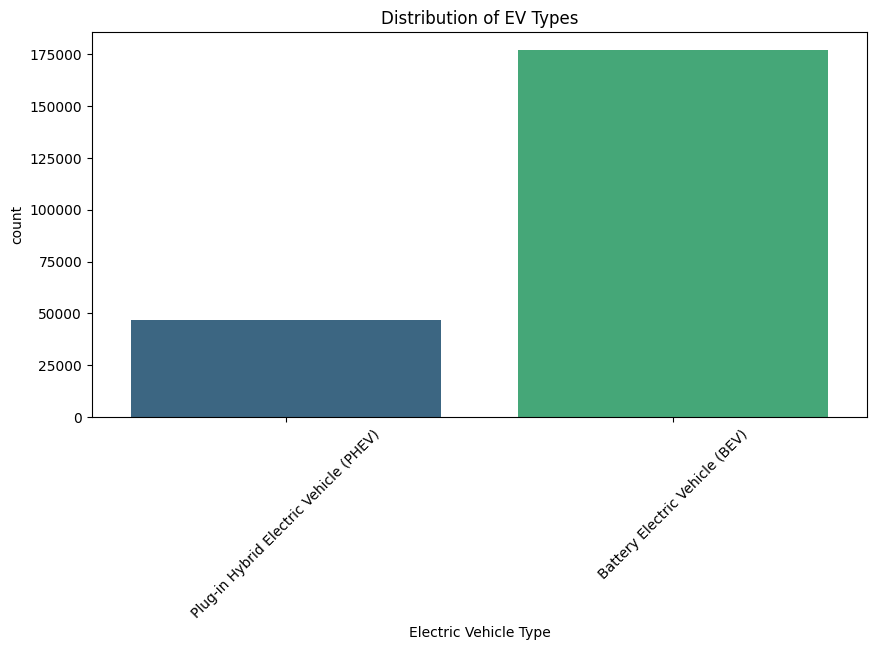

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(x=df["Electric Vehicle Type"], palette="viridis")
plt.title("Distribution of EV Types")
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Encode categorical features using Label Encoding
from sklearn.preprocessing import LabelEncoder

In [ ]:
label_encoders = {}
categorical_features = ["County", "City", "State", "Make", "Model", "Electric Vehicle Type", "Clean Alternative Fuel Vehicle (CAFV) Eligibility", "Electric Utility"]
for col in categorical_features:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [ ]:
numerical_features = ["Postal Code", "Model Year", "Electric Range", "Base MSRP","Legislative District" ]

In [ ]:
from scipy import stats
z_scores = np.abs(stats.zscore(df[numerical_features]))
df = df[(z_scores < 3).all(axis=1)]

In [ ]:
df.reset_index(drop=True, inplace=True)

In [ ]:
remaining_outliers = {}
for col in numerical_features:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    remaining_outliers[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col].count()

print("Remaining outliers in each numerical column:")
print(remaining_outliers)

Remaining outliers in each numerical column:
{'Postal Code': np.int64(6847), 'Model Year': np.int64(10488), 'Electric Range': np.int64(32706), 'Base MSRP': np.int64(0), 'Legislative District': np.int64(0)}


In [ ]:
df["Postal Code"] = np.log1p(df["Postal Code"])
df["Electric Range"] = np.log1p(df["Electric Range"])
df["Model Year"] = np.log1p(df["Model Year"])

In [ ]:
remaining_outliers = {}
for col in numerical_features:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    remaining_outliers[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col].count()

print("Remaining outliers in each numerical column:")
print(remaining_outliers)

Remaining outliers in each numerical column:
{'Postal Code': np.int64(6847), 'Model Year': np.int64(10488), 'Electric Range': np.int64(0), 'Base MSRP': np.int64(0), 'Legislative District': np.int64(0)}


In [ ]:
from scipy import stats

z_scores = np.abs(stats.zscore(df[["Postal Code", "Electric Range", "Model Year"]]))
df = df[(z_scores < 3).all(axis=1)]  # Removes points with Z-score > 3

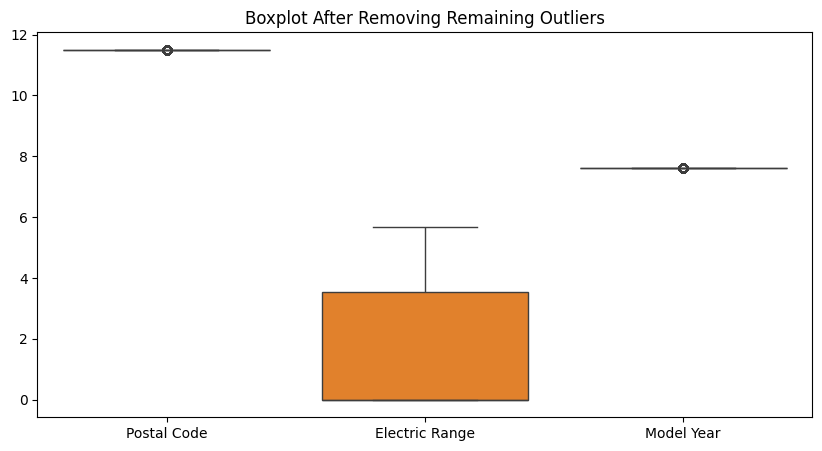

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.boxplot(data=df[["Postal Code", "Electric Range", "Model Year"]])
plt.title("Boxplot After Removing Remaining Outliers")
plt.show()


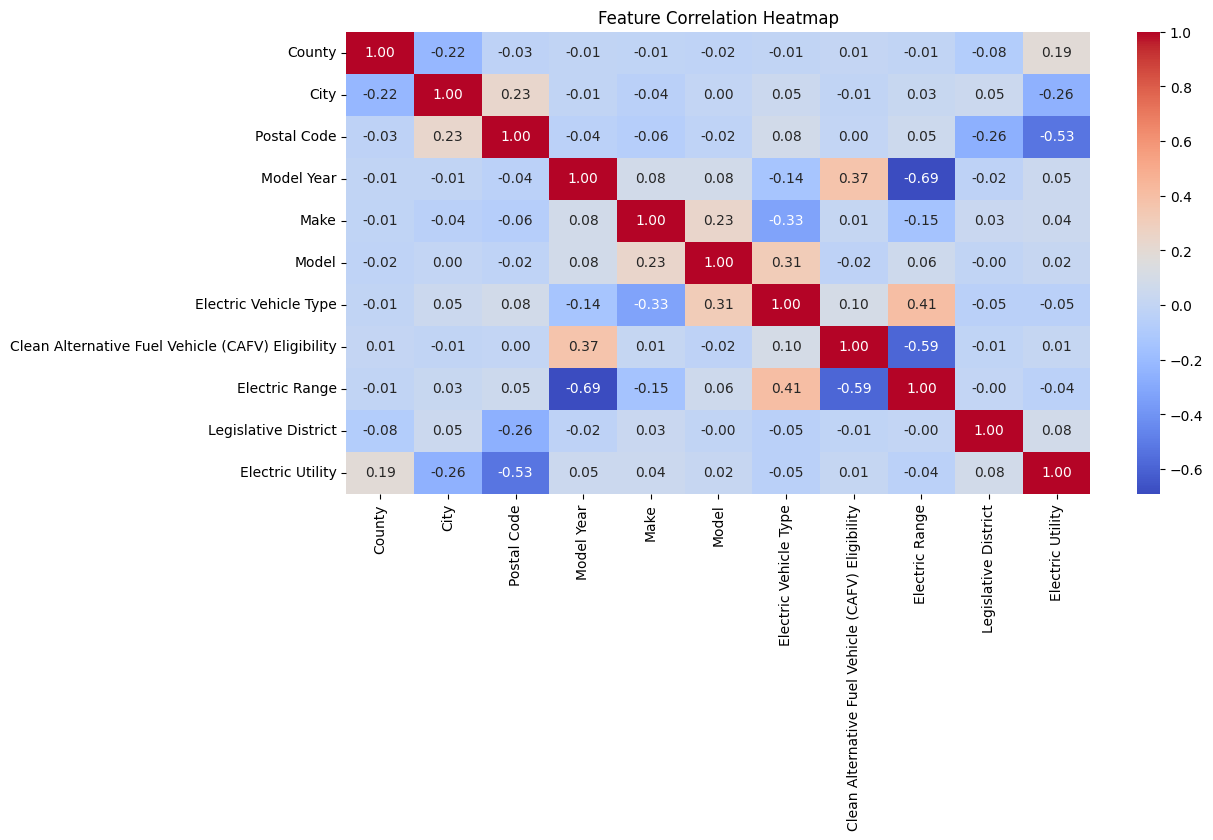

In [ ]:
filtered_df = df.drop(columns=["Base MSRP", "State"], errors='ignore')
plt.figure(figsize=(12, 6))
sns.heatmap(filtered_df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=["Electric Range"])  # Features
y = df["Electric Range"]  # Target Variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
rf_y_pred = rf_model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print("RandomForest Regression Results:")
print(f"MAE: {mean_absolute_error(y_test, rf_y_pred)}")
print(f"MSE: {mean_squared_error(y_test, rf_y_pred)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, rf_y_pred))}")
print(f"R2 Score: {r2_score(y_test, rf_y_pred)}\n")

RandomForest Regression Results:
MAE: 0.0009862414574296561
MSE: 0.00018467674603864508
RMSE: 0.013589582261373787
R2 Score: 0.9999610936802724



**Decision Tree Regressor**

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [ ]:
dt_y_pred = dt_model.predict(X_test)

In [ ]:
print("DecisionTree Regression Results:")
print(f"MAE: {mean_absolute_error(y_test, dt_y_pred)}")
print(f"MSE: {mean_squared_error(y_test, dt_y_pred)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, dt_y_pred))}")
print(f"R2 Score: {r2_score(y_test, dt_y_pred)}\n")

DecisionTree Regression Results:
MAE: 0.0009682102369142103
MSE: 0.00020837147500153125
RMSE: 0.01443507793541591
R2 Score: 0.9999561018514652



In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
lr_y_pred = lr_model.predict(X_test)

In [ ]:
print("Linear Regression Results:")
print(f"MAE: {mean_absolute_error(y_test, lr_y_pred)}")
print(f"MSE: {mean_squared_error(y_test, lr_y_pred)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, lr_y_pred))}")
print(f"R2 Score: {r2_score(y_test, lr_y_pred)}\n")

Linear Regression Results:
MAE: 0.7881498930363828
MSE: 1.1656600565650117
RMSE: 1.079657379248163
R2 Score: 0.7544274315676744



In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

Ridge()

In [ ]:
ridge_y_pred = ridge_model.predict(X_test)

In [ ]:
print("Ridge Regression Results:")
print(f"MAE: {mean_absolute_error(y_test, ridge_y_pred)}")
print(f"MSE: {mean_squared_error(y_test, ridge_y_pred)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, ridge_y_pred))}")
print(f"R2 Score: {r2_score(y_test, ridge_y_pred)}\n")

Ridge Regression Results:
MAE: 0.7881499303114647
MSE: 1.1656603063276967
RMSE: 1.079657494915724
R2 Score: 0.7544273789495345



In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
lasso_model = Lasso(alpha=1.0)
lasso_model.fit(X_train, y_train)

Lasso()

In [ ]:
lasso_y_pred = lasso_model.predict(X_test)

In [ ]:
print("Lasso Regression Results:")
print(f"MAE: {mean_absolute_error(y_test, lasso_y_pred)}")
print(f"MSE: {mean_squared_error(y_test, lasso_y_pred)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, lasso_y_pred))}")
print(f"R2 Score: {r2_score(y_test, lasso_y_pred)}\n")

Lasso Regression Results:
MAE: 1.6966314279191985
MSE: 3.3326170802648822
RMSE: 1.825545693830993
R2 Score: 0.2979090847345678



In [ ]:
from sklearn.ensemble import AdaBoostRegressor

In [ ]:
adaboost_model = AdaBoostRegressor(n_estimators=100, random_state=42)
adaboost_model.fit(X_train, y_train)

AdaBoostRegressor(n_estimators=100, random_state=42)

In [ ]:
adaboost_y_pred = adaboost_model.predict(X_test)

In [ ]:
print("AdaBoost Regression Results:")
print(f"MAE: {mean_absolute_error(y_test, adaboost_y_pred)}")
print(f"MSE: {mean_squared_error(y_test, adaboost_y_pred)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, adaboost_y_pred))}")
print(f"R2 Score: {r2_score(y_test, adaboost_y_pred)}\n")

AdaBoost Regression Results:
MAE: 0.07324985467581474
MSE: 0.02425082627919653
RMSE: 0.15572676802398658
R2 Score: 0.9948910167570314



In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
gbr_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gbr_model.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [ ]:
gbr_y_pred = gbr_model.predict(X_test)

In [ ]:
print("GradientBoosting Regression Results:")
print(f"MAE: {mean_absolute_error(y_test, gbr_y_pred)}")
print(f"MSE: {mean_squared_error(y_test, gbr_y_pred)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, gbr_y_pred))}")
print(f"R2 Score: {r2_score(y_test, gbr_y_pred)}\n")

GradientBoosting Regression Results:
MAE: 0.02908552861546151
MSE: 0.0046683081955985785
RMSE: 0.0683250188115494
R2 Score: 0.9990165156407563



In [ ]:
from xgboost import XGBRegressor

In [ ]:
xgb_model = XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [ ]:
xgb_y_pred = xgb_model.predict(X_test)

In [ ]:
print("XGBoost Regression Results:")
print(f"MAE: {mean_absolute_error(y_test, xgb_y_pred)}")
print(f"MSE: {mean_squared_error(y_test, xgb_y_pred)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, xgb_y_pred))}")
print(f"R2 Score: {r2_score(y_test, xgb_y_pred)}\n")

XGBoost Regression Results:
MAE: 0.0016659169784177421
MSE: 0.0001527929068884196
RMSE: 0.012360942799334506
R2 Score: 0.9999678107297479



In [ ]:
results = {
    'Model': ['RandomForest', 'DecisionTree', 'LinearRegression', 'Ridge', 'Lasso', 'AdaBoost', 'GradientBoosting', 'XGBoost'],
    'MAE': [
        mean_absolute_error(y_test, rf_y_pred),
        mean_absolute_error(y_test, dt_y_pred),
        mean_absolute_error(y_test, lr_y_pred),
        mean_absolute_error(y_test, ridge_y_pred),
        mean_absolute_error(y_test, lasso_y_pred),
        mean_absolute_error(y_test, adaboost_y_pred),
        mean_absolute_error(y_test, gbr_y_pred),
        mean_absolute_error(y_test, xgb_y_pred)
    ],
    'MSE': [
        mean_squared_error(y_test, rf_y_pred),
        mean_squared_error(y_test, dt_y_pred),
        mean_squared_error(y_test, lr_y_pred),
        mean_squared_error(y_test, ridge_y_pred),
        mean_squared_error(y_test, lasso_y_pred),
        mean_squared_error(y_test, adaboost_y_pred),
        mean_squared_error(y_test, gbr_y_pred),
        mean_squared_error(y_test, xgb_y_pred)
    ],
    'RMSE': [
        np.sqrt(mean_squared_error(y_test, rf_y_pred)),
        np.sqrt(mean_squared_error(y_test, dt_y_pred)),
        np.sqrt(mean_squared_error(y_test, lr_y_pred)),
        np.sqrt(mean_squared_error(y_test, ridge_y_pred)),
        np.sqrt(mean_squared_error(y_test, lasso_y_pred)),
        np.sqrt(mean_squared_error(y_test, adaboost_y_pred)),
        np.sqrt(mean_squared_error(y_test, gbr_y_pred)),
        np.sqrt(mean_squared_error(y_test, xgb_y_pred))
    ],
    'R2 Score': [
        r2_score(y_test, rf_y_pred),
        r2_score(y_test, dt_y_pred),
        r2_score(y_test, lr_y_pred),
        r2_score(y_test, ridge_y_pred),
        r2_score(y_test, lasso_y_pred),
        r2_score(y_test, adaboost_y_pred),
        r2_score(y_test, gbr_y_pred),
        r2_score(y_test, xgb_y_pred)
    ]
}

In [ ]:
results_df = pd.DataFrame(results)
results_df

,Model,MAE,MSE,RMSE,R2 Score
0,RandomForest,0.000986,0.000185,0.013590,0.999961
1,DecisionTree,0.000968,0.000208,0.014435,0.999956
2,LinearRegression,0.788150,1.165660,1.079657,0.754427
3,Ridge,0.788150,1.165660,1.079657,0.754427
4,Lasso,1.696631,3.332617,1.825546,0.297909
5,AdaBoost,0.073250,0.024251,0.155727,0.994891
6,GradientBoosting,0.029086,0.004668,0.068325,0.999017
7,XGBoost,0.001666,0.000153,0.012361,0.999968


In [ ]:
results_df = results_df.sort_values(by=['R2 Score'], ascending=False)
results_df = results_df.reset_index(drop=True)  # Reset index after sorting
results_df

,Model,MAE,MSE,RMSE,R2 Score
0,XGBoost,0.001666,0.000153,0.012361,0.999968
1,RandomForest,0.000986,0.000185,0.013590,0.999961
2,DecisionTree,0.000968,0.000208,0.014435,0.999956
3,GradientBoosting,0.029086,0.004668,0.068325,0.999017
4,AdaBoost,0.073250,0.024251,0.155727,0.994891
5,LinearRegression,0.788150,1.165660,1.079657,0.754427
6,Ridge,0.788150,1.165660,1.079657,0.754427
7,Lasso,1.696631,3.332617,1.825546,0.297909


XGboost is the best model

In [100]:
# Example: New vehicle data (Replace with actual values)
new_data = pd.DataFrame({
    "County": [label_encoders["County"].transform(["King"])[0]],  # Encode categorical data
    "City": [label_encoders["City"].transform(["Seattle"])[0]],
    "Make": [label_encoders["Make"].transform(["TOYOTA"])[0]],
    "Model": [label_encoders["Model"].transform(["LEAF"])[0]],
    "Electric Vehicle Type": [label_encoders["Electric Vehicle Type"].transform(["Battery Electric Vehicle (BEV)"])[0]],
    "Clean Alternative Fuel Vehicle (CAFV) Eligibility": [label_encoders["Clean Alternative Fuel Vehicle (CAFV) Eligibility"].transform(["Clean Alternative Fuel Vehicle Eligible"])[0]],
    "Electric Utility": [label_encoders["Electric Utility"].transform(["PUGET SOUND ENERGY INC"])[0]],
    "Postal Code": [np.log1p(98001)],  # Use np.log1p transformation
    "Model Year": [np.log1p(2022)],
    "Legislative District": [37],
    "Base MSRP": [40000],
    "State": [label_encoders["State"].transform(["WA"])[0]],
})

new_data = new_data[X.columns]
new_data_scaled = scaler.transform(new_data)

# Make a prediction
predicted_range = rf_model.predict(new_data_scaled)
print(f"Predicted Electric Range: {np.expm1(predicted_range[0])} miles")

Predicted Electric Range: 175.0054316593343 miles
